In [1071]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pprint
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
from spacy import displacy
from collections import Counter
import re
import textacy.extract
from gensim import corpora, models, similarities, matutils
from sklearn import datasets
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.models import word2vec
import warnings
import umap
import pickle
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [691]:
### Warnings are getting annoying
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [107]:
ls

100years.pdf
100years_en.txt
100years_sp.txt
100years_translated.txt
El Alquimista.pdf
Google_Cloud_Key.json
Project 4 Notebook - Data Gathering.ipynb
Project 4 Notebook - Preprocessing and EDA.ipynb
Untitled.ipynb
alchemist_en.txt
alchemist_en1.txt
alchemist_english.rtf
alchemist_sp.txt
farmer_en.txt
farmer_sp.txt
farmer_translated.txt
livestock_en.txt
livestock_sp.txt
livestock_translated.txt


In [353]:
with open('100years_en.txt','r') as file:
    years_en = file.read()

In [354]:
with open('100years_translated.txt','r') as file:
    years_tr = file.read()

In [355]:
years_en = years_en[3200:]

In [356]:
years_tr = years_tr[258:]

In [357]:
years_tr = years_tr[:-2786]

In [358]:
years_en = years_en.replace('GABRIEL GARCIA MARQUES x ONE HUNDRED YEARS OF SOLITUDE',"")

In [359]:
years_tr = years_tr.replace('Hundred Years of Solitude Gabriel García Márquez','')

[Text(0, 0.5, 'Word Count'),
 Text(0.5, 0, 'Version'),
 Text(0.5, 1.0, 'Word Count by Version')]

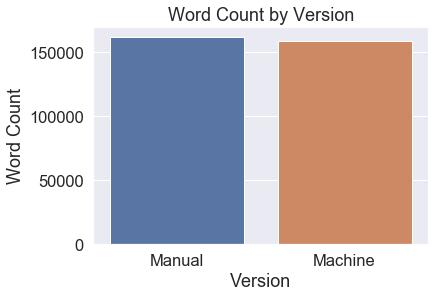

In [1697]:
ax = sns.barplot(x = ['Manual','Machine'],y=[len(word_tokenize(years_en)),len(word_tokenize(years_tr))])
ax.set(xlabel='Version',ylabel='Word Count',title='Word Count by Version')

## Let's use Spacy!

In [363]:
nlp = spacy.load("en")

In [364]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [365]:
doc = nlp(years_en)

In [366]:
doc_tr = nlp(years_tr)

In [604]:
doc

1 


MANY YEARS LATER as he faced the firing squad. Colonel Aureliano Buendfa was to remember that 
distant afternoon when his father took him to discover ice. At that time Macondo was a village of 
twenty adobe houses, built on the bank of a river of clear water that ran along a bed of polished 
stones, which were white and enormous, like prehistoric eggs. The world was so recent that many 
things lacked names, and in order to indicate them it was necessary to point. Every year during the 
month of March a family of ragged gypsies would set up their tents near the village, and with a great 
uproar of pipes and kettledrums they would display new inventions. First they brought the magnet. 
A heavy gypsy with an untamed beard and sparrow hands, who introduced himself as Melquiades, 
put on a bold public demonstration of what he himself called the eighth wonder of the learned al¬ 
chemists of Macedonia. He went from house to house dragging two metal ingots and everybody was 
amazed to see

### Remove stop words, remove punctuation symbols, and lemmatize

In [367]:
val_list_en = []
for token in doc:
    if not token.is_stop and not token.is_punct:
        val_list_en.append(token)

In [368]:
val_list_tr = []
for token in doc_tr:
    if not token.is_stop and not token.is_punct:
        val_list_tr.append(token)

In [369]:
words_en = []
for token in doc:
    words_en.append(token.text)

In [370]:
words_tr = []
for token in doc_tr:
    words_tr.append(token.text)

In [371]:
len(words_en)

171099

In [372]:
len(words_tr)

152765

In [373]:
len(val_list_en)

70299

In [374]:
len(val_list_tr)

61524

In [631]:
stop_words_en = (len(words_en)-len(val_list_en))
stop_words_tr = (len(words_tr)-len(val_list_tr))
print('There are ' + str(stop_words_en) + ' stop words in the manually translated book.')
print('There are ' + str(stop_words_tr) + ' stop words in the machine translated book.')

There are 100800 stop words in the manually translated book.
There are 91241 stop words in the machine translated book.


### Find out characters names

In [613]:
type(val_list_en[4])

spacy.tokens.token.Token

In [376]:
names_en = [name.lemma_ for name in val_list_en if name.pos_ == 'PROPN']

In [377]:
names_tr = [name.lemma_ for name in val_list_tr if name.pos_ == 'PROPN']

In [378]:
print('English version has ',str(len(names_en)),' proper nouns')
print('Translated version: ',str(len(names_tr)),' proper nouns')

English version has  7682  proper nouns
Translated version:  8514  proper nouns


In [379]:
name_freq_en = Counter(names_en)

In [714]:
name_freq_en.most_common(10)

[('Aureliano', 756),
 ('Ursula', 506),
 ('Arcadio', 480),
 ('Jose', 437),
 ('Buendia', 347),
 ('Amaranta', 308),
 ('Segundo', 291),
 ('Colonel', 268),
 ('Fernanda', 217),
 ('Macondo', 176)]

In [381]:
name_freq_tr = Counter(names_tr)

In [710]:
name_freq_tr.most_common(30)

[('Aureliano', 740),
 ('Arcadio', 456),
 ('Úrsula', 436),
 ('José', 429),
 ('Buendía', 364),
 ('Segundo', 281),
 ('Amaranta', 278),
 ('Colonel', 261),
 ('Fernanda', 181),
 ('Macondo', 169),
 ('Márquez', 122),
 ('Remedios', 88),
 ('Meme', 83),
 ('Petra', 69),
 ('Gerineldo', 68),
 ('Pietro', 65),
 ('Rebeca', 60),
 ('Crespi', 60),
 ('de', 60),
 ('Gabriel', 59),
 ('Pilar', 58),
 ('la', 58),
 ('Cotes', 57),
 ('Piedad', 55),
 ('God', 53),
 ('quot;I', 53),
 ('García', 51),
 ('Father', 48),
 ('Ternera', 47),
 ('Santa', 47)]

In [383]:
doc.ents[1].label_

'PERSON'

In [384]:
unique_names_en = [name for name in doc.ents if name.label_ == 'PERSON']
unique_names_tr = [name for name in doc_tr.ents if name.label_ == 'PERSON']

### Should we try something sentence by sentence? (Topic Modeling?)

In [402]:
sentences_en = [sentence.text for sentence in list(doc.sents)]

In [748]:
sentences_tr = [sentence.text for sentence in list(doc_tr.sents)]

In [403]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(sentences_en)
doc_word.shape

(5951, 10203)

In [411]:
lsa = TruncatedSVD(5)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.0146038 , 0.01286122, 0.0106018 , 0.00853073, 0.00794293])

In [413]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             columns = vectorizer.get_feature_names())
topic_word

,10,100,101,102,103,104,105,106,107,108,...,younger,youngest,youth,youthful,yuletide,zinc,zither,zoological,zorzilla,zosimus
0,0.000,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.000,0.001,0.001,...,0.002,0.0,0.004,0.002,0.000,0.001,0.000,0.0,0.0,0.0
1,-0.000,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.000,-0.001,-0.001,...,-0.000,-0.0,-0.000,0.000,-0.000,-0.001,-0.000,-0.0,-0.0,0.0
2,0.001,0.0,-0.0,0.0,0.0,0.0,0.0,0.001,-0.001,-0.000,...,0.004,0.0,0.004,0.001,0.000,0.002,0.001,0.0,0.0,0.0
3,0.001,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.001,-0.002,0.000,...,-0.004,0.0,-0.005,-0.001,0.000,-0.003,0.000,-0.0,0.0,0.0
4,-0.001,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.000,-0.000,0.002,...,0.000,-0.0,0.001,0.001,0.002,-0.001,0.002,0.0,-0.0,-0.0


In [461]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_word)

In [462]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             columns = vectorizer.get_feature_names())
topic_word

,10,100,101,102,103,104,105,106,107,108,...,younger,youngest,youth,youthful,yuletide,zinc,zither,zoological,zorzilla,zosimus
0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.008,0.006,...,0.000,0.000,0.005,0.005,0.000,0.00,0.000,0.0,0.000,0.000
1,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,...,0.001,0.000,0.006,0.006,0.000,0.00,0.000,0.0,0.000,0.000
2,0.006,0.002,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,...,0.001,0.002,0.002,0.004,0.000,0.00,0.000,0.0,0.001,0.001
3,0.000,0.000,0.0,0.0,0.0,0.001,0.0,0.007,0.006,0.000,...,0.024,0.000,0.028,0.006,0.000,0.02,0.000,0.0,0.000,0.000
4,0.000,0.000,0.0,0.0,0.0,0.001,0.0,0.000,0.000,0.007,...,0.006,0.000,0.009,0.006,0.008,0.00,0.009,0.0,0.000,0.000


In [463]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [464]:
display_topics(nmf_model, vectorizer.get_feature_names(), 15)


Topic  0
aureliano, colonel, segundo, buendia, house, said, went, macondo, took, room, war, gerineldo, saw, door, marquez

Topic  1
arcadio, jose, buendia, segundo, house, went, said, rebeca, little, buendfa, like, room, melquiades, son, children

Topic  2
ursula, amaranta, house, went, room, like, fernanda, said, rebeca, came, little, man, order, love, husband

Topic  3
time, house, long, short, macondo, saw, took, man, left, old, years, place, day, night, like

Topic  4
did, like, know, fernanda, tell, come, rest, shit, said, just, day, way, family, life, death


### All the topics have to do with names. At least out topics are stable though.

In [486]:
count_vectorizer = CountVectorizer(stop_words='english',token_pattern='\\b[a-z][a-z]+\\b')
count_vectorizer.fit(sentences_en)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=None, vocabulary=None)

In [487]:
doc_word = count_vectorizer.transform(sentences_en).transpose()
doc_word_df = pd.DataFrame(doc_word.toarray(),count_vectorizer.get_feature_names())

In [488]:
corpus = matutils.Sparse2Corpus(doc_word)

In [489]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [492]:
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)

2020-05-17 11:47:11,234 : INFO : using symmetric alpha at 0.2
2020-05-17 11:47:11,237 : INFO : using symmetric eta at 0.2
2020-05-17 11:47:11,241 : INFO : using serial LDA version on this node
2020-05-17 11:47:11,255 : INFO : running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 5951 documents, updating model once every 2000 documents, evaluating perplexity every 5951 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-17 11:47:11,270 : INFO : PROGRESS: pass 0, at document #2000/5951
2020-05-17 11:47:12,722 : INFO : merging changes from 2000 documents into a model of 5951 documents
2020-05-17 11:47:12,728 : INFO : topic #0 (0.200): 0.016*"arcadio" + 0.013*"did" + 0.010*"jose" + 0.009*"ursula" + 0.009*"time" + 0.008*"buendia" + 0.007*"rebeca" + 0.006*"amaranta" + 0.005*"house" + 0.005*"night"
2020-05-17 11:47:12,730 : INFO : topic #1 (0.200): 0.012*"arcadio" + 0.010*"aureliano" + 0.010*"jose" + 0.009*"went" + 0.007*"ursula" + 0.00

2020-05-17 11:47:19,609 : INFO : topic #4 (0.200): 0.025*"aureliano" + 0.008*"segundo" + 0.007*"colonel" + 0.006*"fernanda" + 0.005*"ursula" + 0.005*"buendia" + 0.004*"said" + 0.004*"left" + 0.004*"months" + 0.004*"parchments"
2020-05-17 11:47:19,610 : INFO : topic diff=0.432197, rho=0.448313
2020-05-17 11:47:19,636 : INFO : PROGRESS: pass 2, at document #2000/5951
2020-05-17 11:47:20,323 : INFO : merging changes from 2000 documents into a model of 5951 documents
2020-05-17 11:47:20,328 : INFO : topic #0 (0.200): 0.014*"did" + 0.012*"time" + 0.009*"ursula" + 0.009*"arcadio" + 0.008*"amaranta" + 0.007*"jose" + 0.006*"house" + 0.006*"rebeca" + 0.005*"door" + 0.005*"aureliano"
2020-05-17 11:47:20,330 : INFO : topic #1 (0.200): 0.018*"aureliano" + 0.010*"arcadio" + 0.010*"colonel" + 0.009*"buendia" + 0.009*"jose" + 0.009*"went" + 0.007*"did" + 0.006*"father" + 0.006*"ursula" + 0.005*"time"
2020-05-17 11:47:20,331 : INFO : topic #2 (0.200): 0.006*"ursula" + 0.006*"said" + 0.005*"time" + 0.0

2020-05-17 11:47:26,010 : INFO : topic diff=0.245876, rho=0.378628
2020-05-17 11:47:26,037 : INFO : PROGRESS: pass 4, at document #2000/5951
2020-05-17 11:47:26,667 : INFO : merging changes from 2000 documents into a model of 5951 documents
2020-05-17 11:47:26,673 : INFO : topic #0 (0.200): 0.013*"did" + 0.012*"time" + 0.010*"ursula" + 0.009*"amaranta" + 0.008*"arcadio" + 0.006*"jose" + 0.006*"rebeca" + 0.006*"house" + 0.005*"aureliano" + 0.005*"door"
2020-05-17 11:47:26,675 : INFO : topic #1 (0.200): 0.020*"aureliano" + 0.011*"colonel" + 0.011*"buendia" + 0.011*"arcadio" + 0.010*"jose" + 0.009*"went" + 0.007*"father" + 0.007*"did" + 0.006*"said" + 0.005*"ursula"
2020-05-17 11:47:26,680 : INFO : topic #2 (0.200): 0.006*"ursula" + 0.006*"said" + 0.005*"remedios" + 0.005*"like" + 0.005*"house" + 0.005*"way" + 0.005*"time" + 0.004*"did" + 0.004*"kept" + 0.003*"black"
2020-05-17 11:47:26,683 : INFO : topic #3 (0.200): 0.012*"arcadio" + 0.011*"jose" + 0.010*"time" + 0.009*"house" + 0.009*"u

In [493]:
lda.print_topics()

2020-05-17 11:47:48,143 : INFO : topic #0 (0.200): 0.013*"time" + 0.013*"did" + 0.010*"amaranta" + 0.009*"ursula" + 0.007*"aureliano" + 0.006*"fernanda" + 0.006*"house" + 0.006*"arcadio" + 0.006*"door" + 0.005*"jose"
2020-05-17 11:47:48,146 : INFO : topic #1 (0.200): 0.023*"aureliano" + 0.016*"colonel" + 0.011*"buendia" + 0.008*"jose" + 0.008*"arcadio" + 0.008*"went" + 0.007*"segundo" + 0.007*"did" + 0.006*"said" + 0.006*"time"
2020-05-17 11:47:48,148 : INFO : topic #2 (0.200): 0.005*"ursula" + 0.005*"like" + 0.005*"remedios" + 0.005*"house" + 0.005*"said" + 0.005*"time" + 0.005*"beauty" + 0.004*"way" + 0.004*"did" + 0.004*"kept"
2020-05-17 11:47:48,150 : INFO : topic #3 (0.200): 0.011*"time" + 0.009*"house" + 0.009*"ursula" + 0.009*"arcadio" + 0.009*"jose" + 0.008*"like" + 0.006*"amaranta" + 0.006*"great" + 0.005*"man" + 0.005*"bed"
2020-05-17 11:47:48,153 : INFO : topic #4 (0.200): 0.024*"aureliano" + 0.009*"segundo" + 0.007*"colonel" + 0.006*"fernanda" + 0.005*"ursula" + 0.005*"petr

[(0,
  '0.013*"time" + 0.013*"did" + 0.010*"amaranta" + 0.009*"ursula" + 0.007*"aureliano" + 0.006*"fernanda" + 0.006*"house" + 0.006*"arcadio" + 0.006*"door" + 0.005*"jose"'),
 (1,
  '0.023*"aureliano" + 0.016*"colonel" + 0.011*"buendia" + 0.008*"jose" + 0.008*"arcadio" + 0.008*"went" + 0.007*"segundo" + 0.007*"did" + 0.006*"said" + 0.006*"time"'),
 (2,
  '0.005*"ursula" + 0.005*"like" + 0.005*"remedios" + 0.005*"house" + 0.005*"said" + 0.005*"time" + 0.005*"beauty" + 0.004*"way" + 0.004*"did" + 0.004*"kept"'),
 (3,
  '0.011*"time" + 0.009*"house" + 0.009*"ursula" + 0.009*"arcadio" + 0.009*"jose" + 0.008*"like" + 0.006*"amaranta" + 0.006*"great" + 0.005*"man" + 0.005*"bed"'),
 (4,
  '0.024*"aureliano" + 0.009*"segundo" + 0.007*"colonel" + 0.006*"fernanda" + 0.005*"ursula" + 0.005*"petra" + 0.005*"cotes" + 0.005*"buendia" + 0.005*"said" + 0.004*"left"')]

In [494]:
lda_corpus = lda[corpus]
lda_corpus

In [495]:
lda_docs = [doc for doc in lda_corpus]

In [496]:
lda_docs[0:5]

[[(0, 0.033525836),
  (1, 0.86554295),
  (2, 0.033589672),
  (3, 0.033643804),
  (4, 0.03369778)],
 [(0, 0.018344339),
  (1, 0.9263845),
  (2, 0.018386658),
  (3, 0.01848254),
  (4, 0.018401943)],
 [(0, 0.010170603),
  (1, 0.01009766),
  (2, 0.010253874),
  (3, 0.95935607),
  (4, 0.010121818)],
 [(0, 0.23705971),
  (1, 0.020325968),
  (2, 0.7020937),
  (3, 0.020203134),
  (4, 0.020317465)],
 [(0, 0.011211742),
  (1, 0.011236703),
  (2, 0.9547753),
  (3, 0.011486452),
  (4, 0.011289822)]]

In [501]:
for i,sentence in enumerate(sentences_en[0:6]):
    print(i,sentence)

0 1 


MANY YEARS LATER as he faced the firing squad.
1 Colonel Aureliano Buendfa was to remember that 
distant afternoon when his father took him to discover ice.
2 At that time Macondo was a village of 
twenty adobe houses, built on the bank of a river of clear water that ran along a bed of polished 
stones, which were white and enormous, like prehistoric eggs.
3 The world was so recent that many 
things lacked names, and in order to indicate them it was necessary to point.
4 Every year during the 
month of March a family of ragged gypsies would set up their tents near the village, and with a great 
uproar of pipes and kettledrums they would display new inventions.
5 First they brought the magnet. 



### Let's try doing topic modeling with pages

Make a pipeline for topic modeling

In [570]:
with open('100years_en.txt','r') as file:
    years_enp = file.read()

In [571]:
with open('100years_translated.txt','r') as file:
    years_trp = file.read()

In [572]:
years_enp = years_enp.split('GABRIEL GARCIA MARQUES x ONE HUNDRED YEARS OF SOLITUDE')

In [573]:
years_trp = re.sub(r'[Oo]?n?e? ?[Hh]undred [Yy]ears [Oo]f [Ss]olitude','',years_trp)

In [574]:
years_trp = years_trp.split('Gabriel García Márquez')

### The pages don't line up. Ughhhhhhhhh. Might as well do some analysis on the years_enp to find a topic

In [605]:
years_enp.lemma_

AttributeError: 'list' object has no attribute 'lemma_'

In [1399]:
def topicize(model_type,text,num_topics,func):
    # Pipeline that returns topics

    """"fixed_text = []
    
    if type(text) == list:
        for i in text:
            doc = nlp(i)
            sentence1 = ''
        for item in doc:
            if item.pos_ != 'PROPN':
                sentence1 = sentence1 + ' ' + item.text
        fixed_text.append(sentence1)    
    
    elif type(text) == str:
        doc = nlp(text)
        sentence1 = ''
        for item in doc:
            if item.pos_ != 'PROPN':
                sentence1 = sentence1 + ' ' + item.text
        fixed_text.append(sentence1)"""

    vectorizer = CountVectorizer(stop_words='english',token_pattern='\\b[a-z][a-z]+\\b',max_features=200000)
    doc_word = vectorizer.fit_transform(text)
    transformer = TfidfTransformer(smooth_idf=False)
    x_tfidf = transformer.fit_transform(doc_word)
    xtfidf_norm = normalize(x_tfidf,norm='l1',axis=1)
    
    if model_type == 'NMF':
        model = NMF(num_topics)
        doc_topic = model.fit_transform(xtfidf_norm)
        topics = display_topics(model,vectorizer.get_feature_names(),15)
        doc_topic_model = pd.DataFrame(doc_topic.round(5))
    
    elif model_type == 'LSA':
        model = TruncatedSVD(num_topics)
        doc_topic = model.fit_transform(xtfidf_norm)
        topics = display_topics(model,vectorizer.get_feature_names(),15)
        doc_topic_model = pd.DataFrame(doc_topic.round(5))
    
    elif model_type == 'LDA':
        corpus = matutils.Sparse2Corpus(doc_word)
        id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
        model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=30,minimum_probability=.5)
        topics = model.print_topics()
    
    if func == 'print':
        print(topics)
        
    elif func == 'topic':
        return topics
    
    elif func == 'model':
        return model
    
    elif func == 'vector':
        return doc_word
    
    elif func == 'component':
        return doc_topic_model

In [1398]:
count_vectorizer.vocabulary_.items()

dict_items([('years', 9990), ('later', 5005), ('faced', 3288), ('firing', 3483), ('squad', 8404), ('colonel', 1686), ('aureliano', 579), ('buendfa', 1106), ('remember', 7300), ('distant', 2661), ('afternoon', 160), ('father', 3366), ('took', 9088), ('discover', 2590), ('ice', 4348), ('time', 9024), ('macondo', 5295), ('village', 9590), ('adobe', 112), ('houses', 4302), ('built', 1117), ('bank', 670), ('river', 7518), ('clear', 1567), ('water', 9728), ('ran', 7066), ('bed', 760), ('polished', 6649), ('stones', 8513), ('white', 9819), ('enormous', 3028), ('like', 5131), ('prehistoric', 6754), ('eggs', 2915), ('world', 9936), ('recent', 7162), ('things', 8968), ('lacked', 4954), ('names', 5839), ('order', 6114), ('indicate', 4519), ('necessary', 5870), ('point', 6635), ('year', 9987), ('month', 5708), ('march', 5384), ('family', 3324), ('ragged', 7045), ('gypsies', 4018), ('set', 7904), ('tents', 8918), ('near', 5862), ('great', 3951), ('uproar', 9455), ('pipes', 6536), ('kettledrums', 48

In [630]:
topicize('LSA',years_enp,10)


Topic  0
aureliano, time, ursula, arcadio, did, jose, house, buendia, colonel, amaranta

Topic  1
arcadio, jose, buendia, went, rebeca, did, melquiades, village, gypsy, crespi

Topic  2
colonel, buendia, war, gerineldo, marquez, aureliano, said, general, ursula, officers

Topic  3
segundo, aureliano, jose, arcadio, petra, room, cotes, buendia, colonel, la

Topic  4
meme, colonel, fernanda, buendia, mauricio, babilonia, did, time, said, macondo

Topic  5
rebeca, remedios, aureliano, moscote, father, said, crespi, don, pietro, apolinar

Topic  6
segundo, amaranta, crespi, pietro, rebeca, colonel, arcadio, gerineldo, marquez, petra

Topic  7
house, time, war, macondo, years, order, segundo, town, beauty, set

Topic  8
did, remedios, time, beauty, segundo, man, felt, love, colonel, thought

Topic  9
house, did, room, piedad, santa, la, sofia, like, officer, fernanda
None


In [622]:
topicize('LDA',years_enp,5)

2020-05-19 13:22:10,520 : INFO : using symmetric alpha at 0.2
2020-05-19 13:22:10,528 : INFO : using symmetric eta at 0.2
2020-05-19 13:22:10,535 : INFO : using serial LDA version on this node
2020-05-19 13:22:10,574 : INFO : running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 10093 documents, updating model once every 2000 documents, evaluating perplexity every 10093 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-19 13:22:10,607 : INFO : PROGRESS: pass 0, at document #2000/10093
2020-05-19 13:22:11,791 : INFO : merging changes from 2000 documents into a model of 10093 documents
2020-05-19 13:22:11,806 : INFO : topic #0 (0.200): 0.015*"aim" + 0.015*"aimlessly" + 0.015*"able" + 0.014*"aims" + 0.013*"ago" + 0.012*"ailment" + 0.011*"accomplice" + 0.011*"aged" + 0.011*"accounting" + 0.010*"affecting"
2020-05-19 13:22:11,808 : INFO : topic #1 (0.200): 0.012*"aguilar" + 0.012*"affairs" + 0.012*"advance" + 0.012*"adjustment" + 0.

2020-05-19 13:22:16,612 : INFO : topic #2 (0.200): 0.035*"ahuyama" + 0.028*"aimed" + 0.025*"abused" + 0.023*"accepting" + 0.022*"abundant" + 0.022*"air" + 0.021*"aground" + 0.019*"absentia" + 0.018*"advertised" + 0.018*"according"
2020-05-19 13:22:16,615 : INFO : topic #3 (0.200): 0.012*"abnegation" + 0.011*"admitting" + 0.011*"aging" + 0.010*"affinity" + 0.010*"afraid" + 0.010*"adventurer" + 0.010*"adults" + 0.010*"advantage" + 0.010*"admit" + 0.010*"adjusted"
2020-05-19 13:22:16,617 : INFO : topic #4 (0.200): 0.041*"admiration" + 0.039*"admirable" + 0.027*"adolescence" + 0.025*"ahead" + 0.020*"adequate" + 0.019*"agony" + 0.018*"abstinence" + 0.018*"affliction" + 0.016*"affray" + 0.016*"aerial"
2020-05-19 13:22:16,619 : INFO : topic diff=0.144668, rho=0.408248
2020-05-19 13:22:16,643 : INFO : PROGRESS: pass 1, at document #2000/10093
2020-05-19 13:22:17,416 : INFO : merging changes from 2000 documents into a model of 10093 documents
2020-05-19 13:22:17,425 : INFO : topic #0 (0.200): 0

2020-05-19 13:22:21,310 : INFO : topic #0 (0.200): 0.052*"ago" + 0.050*"ailment" + 0.038*"accomplices" + 0.033*"abandon" + 0.031*"account" + 0.031*"abjection" + 0.031*"able" + 0.028*"aim" + 0.027*"accidents" + 0.021*"airmail"
2020-05-19 13:22:21,313 : INFO : topic #1 (0.200): 0.055*"affected" + 0.053*"affairs" + 0.034*"adventurers" + 0.026*"aided" + 0.025*"affectionate" + 0.024*"accompanied" + 0.024*"aguilar" + 0.023*"ailments" + 0.022*"afflictions" + 0.020*"aegean"
2020-05-19 13:22:21,316 : INFO : topic #2 (0.200): 0.045*"ahuyama" + 0.038*"aimed" + 0.033*"accepting" + 0.026*"according" + 0.025*"adolescent" + 0.024*"absentia" + 0.022*"aground" + 0.022*"air" + 0.021*"abject" + 0.021*"abused"
2020-05-19 13:22:21,327 : INFO : topic #3 (0.200): 0.011*"abnegation" + 0.010*"admit" + 0.010*"advantage" + 0.010*"addition" + 0.009*"affinity" + 0.009*"adjusted" + 0.009*"admitting" + 0.009*"accompaniment" + 0.009*"aging" + 0.009*"accelerated"
2020-05-19 13:22:21,338 : INFO : topic #4 (0.200): 0.05

2020-05-19 13:22:25,966 : INFO : topic diff=0.046135, rho=0.352530
2020-05-19 13:22:26,050 : INFO : -5.548 per-word bound, 46.8 perplexity estimate based on a held-out corpus of 93 documents with 976 words
2020-05-19 13:22:26,051 : INFO : PROGRESS: pass 2, at document #10093/10093
2020-05-19 13:22:26,093 : INFO : merging changes from 93 documents into a model of 10093 documents
2020-05-19 13:22:26,099 : INFO : topic #0 (0.200): 0.051*"ailment" + 0.050*"ago" + 0.043*"abandoning" + 0.037*"accomplices" + 0.032*"abandon" + 0.032*"account" + 0.032*"abjection" + 0.030*"aim" + 0.029*"able" + 0.026*"accidents"
2020-05-19 13:22:26,101 : INFO : topic #1 (0.200): 0.065*"affected" + 0.061*"affairs" + 0.034*"adventurers" + 0.031*"affectionate" + 0.028*"aided" + 0.026*"accompanied" + 0.025*"ailments" + 0.025*"aegean" + 0.023*"aguilar" + 0.022*"afflictions"
2020-05-19 13:22:26,103 : INFO : topic #2 (0.200): 0.041*"accepting" + 0.041*"ahuyama" + 0.040*"aimed" + 0.039*"according" + 0.032*"adolescent" +

2020-05-19 13:22:30,375 : INFO : topic #3 (0.200): 0.007*"abnegation" + 0.007*"admitted" + 0.007*"affinity" + 0.007*"accordance" + 0.007*"adults" + 0.007*"accordion" + 0.007*"actors" + 0.007*"acquire" + 0.007*"admired" + 0.007*"agile"
2020-05-19 13:22:30,380 : INFO : topic #4 (0.200): 0.046*"adolescence" + 0.035*"admiration" + 0.025*"admonitions" + 0.024*"admirable" + 0.023*"aerial" + 0.022*"affliction" + 0.022*"adequate" + 0.021*"ahead" + 0.021*"advancing" + 0.019*"adverse"
2020-05-19 13:22:30,386 : INFO : topic diff=0.032420, rho=0.332476
2020-05-19 13:22:30,458 : INFO : -5.526 per-word bound, 46.1 perplexity estimate based on a held-out corpus of 93 documents with 976 words
2020-05-19 13:22:30,459 : INFO : PROGRESS: pass 3, at document #10093/10093
2020-05-19 13:22:30,512 : INFO : merging changes from 93 documents into a model of 10093 documents
2020-05-19 13:22:30,524 : INFO : topic #0 (0.200): 0.051*"ailment" + 0.048*"ago" + 0.045*"abandoning" + 0.036*"accomplices" + 0.032*"accoun

2020-05-19 13:22:47,581 : INFO : topic #1 (0.200): 0.056*"affected" + 0.054*"affairs" + 0.034*"affectionate" + 0.030*"aided" + 0.030*"aguilar" + 0.029*"ailments" + 0.027*"adobe" + 0.023*"afflictions" + 0.022*"advanced" + 0.022*"afraid"
2020-05-19 13:22:47,591 : INFO : topic #2 (0.200): 0.037*"according" + 0.033*"aimed" + 0.033*"adolescent" + 0.031*"ahuyama" + 0.026*"advisers" + 0.024*"aground" + 0.024*"accepting" + 0.023*"acceptance" + 0.022*"abject" + 0.022*"abnormal"
2020-05-19 13:22:47,593 : INFO : topic #3 (0.200): 0.007*"abnegation" + 0.007*"admitted" + 0.007*"accordance" + 0.007*"affinity" + 0.007*"air" + 0.007*"adults" + 0.007*"admired" + 0.007*"advantage" + 0.007*"actors" + 0.007*"accordion"
2020-05-19 13:22:47,601 : INFO : topic #4 (0.200): 0.045*"adolescence" + 0.034*"admiration" + 0.024*"admirable" + 0.024*"admonitions" + 0.023*"affliction" + 0.023*"ahead" + 0.023*"aerial" + 0.021*"advancing" + 0.021*"adequate" + 0.020*"adverse"
2020-05-19 13:22:47,603 : INFO : topic diff=0.

[(0, '0.050*"ailment" + 0.047*"ago" + 0.045*"abandoning" + 0.036*"accomplices" + 0.032*"abjection" + 0.032*"account" + 0.032*"abandon" + 0.031*"aim" + 0.028*"able" + 0.025*"accidents"'), (1, '0.075*"affected" + 0.068*"affairs" + 0.039*"afraid" + 0.036*"affectionate" + 0.029*"aided" + 0.028*"ailments" + 0.024*"aguilar" + 0.023*"agents" + 0.022*"affair" + 0.022*"aegean"'), (2, '0.051*"according" + 0.046*"accepting" + 0.039*"ahuyama" + 0.038*"aimed" + 0.035*"adolescent" + 0.029*"acceptance" + 0.024*"advisers" + 0.023*"absentia" + 0.023*"agitation" + 0.021*"abject"'), (3, '0.010*"admit" + 0.010*"abnegation" + 0.009*"air" + 0.009*"advantage" + 0.009*"addition" + 0.009*"adjusted" + 0.009*"accompaniment" + 0.009*"affinity" + 0.008*"aging" + 0.008*"accelerated"'), (4, '0.057*"admiration" + 0.043*"admirable" + 0.039*"adolescence" + 0.026*"affliction" + 0.025*"ahead" + 0.024*"aerial" + 0.023*"advised" + 0.021*"aggressive" + 0.020*"advising" + 0.020*"addressed"')]


In [632]:
topicize('NMF',years_trp,10)


Topic  0
quot, said, don, time, did, arcadio, asked, felt, replied, going

Topic  1
aureliano, amaranta, room, time, like, did, love, house, left, bed

Topic  2
arcadio, house, time, room, did, man, night, gave, went, later

Topic  3
segundo, aureliano, room, arcadio, la, piedad, door, officer, santa, colonel

Topic  4
meme, fernanda, did, mauricio, babilonia, time, segundo, daughter, aureliano, night

Topic  5
colonel, aureliano, quot, war, gerineldo, general, house, time, death, macondo

Topic  6
segundo, aureliano, petra, cotes, house, time, quot, fernanda, years, old

Topic  7
amaranta, crespi, pietro, rebeca, house, did, rebecca, death, love, wedding

Topic  8
aureliano, don, moscote, apolinar, quot, father, house, law, did, said

Topic  9
did, time, macondo, house, remedios, like, beautiful, day, years, men
None


In [882]:
topicize('NMF',english_years,5)

ValueError: Iterable over raw text documents expected, string object received.

# Please do TSNE

In [1302]:
sentences_eng = [sentence for sentence in doc.sents]
sentences_s = [sentence.text for sentence in doc.sents]
sentence_str = [sentence.text for sentence in doc_tr.sents]

In [664]:
sentences_eng1 = []
for sentence in sentences_eng:
    sentence1 = ''
    for item in sentence:
        if item.pos_ != 'PROPN':
            sentence1 = sentence1 + ' ' + item.text
    sentences_eng1.append(sentence1)     

In [669]:
topicize('NMF',sentences_eng1,5)


Topic  0
time, long, short, saw, war, place, took, thought, death, day

Topic  1
did, know, day, life, way, understand, come, death, long, felt

Topic  2
house, order, left, children, years, days, town, brought, old, came

Topic  3
like, said, just, man, tell, little, took, shit, eyes, old

Topic  4
went, room, door, left, night, came, living, gave, bedroom, saw
None


In [1700]:
topicize('NMF',sentences_tr1,4,'component')


Topic  0
say, good, leave, recognize, sit, won, pass, voice, tone, corridor, come, simple, scare, man, spit

Topic  1
quot, know, tell, come, reply, morning, murmur, course, man, want, insist, explain, crazy, compadre, order

Topic  2
ask, question, want, night, alarm, tell, time, speak, gypsy, amazed, owner, innocently, help, friend, reply

Topic  3
year, solitude, time, old, come, loneliness, know, solitudegabriel, day, house, think, afternoon, die, war, care


,0,1,2,3
0,0.00004,0.00000,0.00008,0.04413
1,0.00008,0.00070,0.00044,0.00141
2,0.00008,0.00076,0.00083,0.00231
3,0.00000,0.00135,0.00079,0.02300
4,0.00000,0.00153,0.00078,0.00135
...,...,...,...,...
5714,0.00003,0.00032,0.00025,0.00106
5715,0.00002,0.00019,0.00018,0.00139
5716,0.00010,0.00044,0.00049,0.00223
5717,0.00013,0.00055,0.00017,0.00102


In [671]:
topicize('LDA',sentences_eng1,5)

2020-05-19 15:13:38,354 : INFO : using symmetric alpha at 0.2
2020-05-19 15:13:38,370 : INFO : using symmetric eta at 0.2
2020-05-19 15:13:38,385 : INFO : using serial LDA version on this node
2020-05-19 15:13:38,407 : INFO : running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 9490 documents, updating model once every 2000 documents, evaluating perplexity every 9490 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-19 15:13:38,425 : INFO : PROGRESS: pass 0, at document #2000/9490
2020-05-19 15:13:39,539 : INFO : merging changes from 2000 documents into a model of 9490 documents
2020-05-19 15:13:39,560 : INFO : topic #0 (0.200): 0.002*"foreigners" + 0.002*"cough" + 0.002*"hoot" + 0.002*"guest" + 0.002*"linear" + 0.002*"foundering" + 0.002*"filial" + 0.002*"district" + 0.002*"flashed" + 0.002*"er"
2020-05-19 15:13:39,564 : INFO : topic #1 (0.200): 0.003*"kingdom" + 0.002*"en" + 0.002*"inscribed" + 0.002*"begonia" + 0.002*"land"

2020-05-19 15:13:43,475 : INFO : topic #3 (0.200): 0.005*"bandit" + 0.003*"album" + 0.003*"crown" + 0.002*"jack" + 0.002*"milked" + 0.002*"glow" + 0.002*"kneaded" + 0.002*"mortals" + 0.002*"kindle" + 0.002*"lances"
2020-05-19 15:13:43,479 : INFO : topic #4 (0.200): 0.003*"labor" + 0.003*"monsters" + 0.002*"jargon" + 0.002*"limited" + 0.002*"messianic" + 0.002*"mud" + 0.002*"meringues" + 0.002*"intemperate" + 0.002*"implied" + 0.002*"keeping"
2020-05-19 15:13:43,482 : INFO : topic diff=0.202348, rho=0.385043
2020-05-19 15:13:43,519 : INFO : PROGRESS: pass 1, at document #4000/9490
2020-05-19 15:13:43,963 : INFO : merging changes from 2000 documents into a model of 9490 documents
2020-05-19 15:13:43,984 : INFO : topic #0 (0.200): 0.003*"fishermen" + 0.003*"archangel" + 0.002*"foreigners" + 0.002*"mug" + 0.002*"brim" + 0.002*"necromancer" + 0.002*"dispatched" + 0.002*"gag" + 0.002*"like" + 0.002*"fruit"
2020-05-19 15:13:43,986 : INFO : topic #1 (0.200): 0.003*"land" + 0.002*"milton" + 0.0

2020-05-19 15:13:46,803 : INFO : topic #3 (0.200): 0.004*"bandit" + 0.003*"album" + 0.003*"crown" + 0.003*"glow" + 0.002*"kindle" + 0.002*"cubes" + 0.002*"jack" + 0.002*"milked" + 0.002*"kneaded" + 0.002*"mortals"
2020-05-19 15:13:46,805 : INFO : topic #4 (0.200): 0.003*"monsters" + 0.003*"messianic" + 0.003*"jargon" + 0.003*"labor" + 0.003*"limited" + 0.002*"murmuring" + 0.002*"mythical" + 0.002*"mischief" + 0.002*"arcaya" + 0.002*"mud"
2020-05-19 15:13:46,807 : INFO : topic diff=0.132420, rho=0.359327
2020-05-19 15:13:46,831 : INFO : PROGRESS: pass 2, at document #6000/9490
2020-05-19 15:13:47,221 : INFO : merging changes from 2000 documents into a model of 9490 documents
2020-05-19 15:13:47,226 : INFO : topic #0 (0.200): 0.003*"fishermen" + 0.003*"mug" + 0.002*"archangel" + 0.002*"hand" + 0.002*"heated" + 0.002*"foreigners" + 0.002*"mbble" + 0.002*"fruit" + 0.002*"dispatched" + 0.002*"brim"
2020-05-19 15:13:47,237 : INFO : topic #1 (0.200): 0.003*"forgetting" + 0.003*"cru" + 0.003*"

2020-05-19 15:13:49,891 : INFO : topic #3 (0.200): 0.004*"album" + 0.004*"bandit" + 0.003*"kindle" + 0.003*"cubes" + 0.003*"crown" + 0.003*"jack" + 0.002*"kneaded" + 0.002*"ability" + 0.002*"glow" + 0.002*"cologne"
2020-05-19 15:13:49,893 : INFO : topic #4 (0.200): 0.004*"monsters" + 0.003*"messianic" + 0.003*"limited" + 0.002*"noble" + 0.002*"jargon" + 0.002*"murmuring" + 0.002*"extra" + 0.002*"mythical" + 0.002*"mud" + 0.002*"finally"
2020-05-19 15:13:49,894 : INFO : topic diff=0.112036, rho=0.338158
2020-05-19 15:13:49,915 : INFO : PROGRESS: pass 3, at document #8000/9490
2020-05-19 15:13:50,366 : INFO : merging changes from 2000 documents into a model of 9490 documents
2020-05-19 15:13:50,372 : INFO : topic #0 (0.200): 0.003*"fishermen" + 0.003*"mug" + 0.003*"archangel" + 0.002*"like" + 0.002*"acceded" + 0.002*"acrobatics" + 0.002*"fruit" + 0.002*"mbble" + 0.002*"dispatched" + 0.002*"hoped"
2020-05-19 15:13:50,375 : INFO : topic #1 (0.200): 0.003*"cru" + 0.003*"land" + 0.003*"forge

2020-05-19 15:13:52,990 : INFO : topic #3 (0.200): 0.004*"album" + 0.003*"bandit" + 0.003*"kneaded" + 0.003*"kindle" + 0.003*"cubes" + 0.003*"crown" + 0.002*"milked" + 0.002*"jack" + 0.002*"calculated" + 0.002*"armistice"
2020-05-19 15:13:52,998 : INFO : topic #4 (0.200): 0.004*"monsters" + 0.003*"messianic" + 0.003*"jargon" + 0.002*"limited" + 0.002*"extra" + 0.002*"finest" + 0.002*"noble" + 0.002*"labor" + 0.002*"bored" + 0.002*"lulled"
2020-05-19 15:13:52,999 : INFO : topic diff=0.094245, rho=0.320338
2020-05-19 15:13:53,509 : INFO : -9.191 per-word bound, 584.6 perplexity estimate based on a held-out corpus of 1490 documents with 9692 words
2020-05-19 15:13:53,510 : INFO : PROGRESS: pass 4, at document #9490/9490
2020-05-19 15:13:53,776 : INFO : merging changes from 1490 documents into a model of 9490 documents
2020-05-19 15:13:53,781 : INFO : topic #0 (0.200): 0.003*"mug" + 0.003*"fishermen" + 0.003*"archangel" + 0.002*"like" + 0.002*"brim" + 0.002*"fruit" + 0.002*"milked" + 0.002

[(0, '0.003*"mug" + 0.003*"fishermen" + 0.003*"archangel" + 0.002*"like" + 0.002*"brim" + 0.002*"fruit" + 0.002*"milked" + 0.002*"fantasies" + 0.002*"acceded" + 0.002*"flung"'), (1, '0.003*"cru" + 0.003*"milton" + 0.003*"land" + 0.003*"forebear" + 0.002*"forgetting" + 0.002*"leash" + 0.002*"flask" + 0.002*"nicanor" + 0.002*"instructions" + 0.002*"enthusiastic"'), (2, '0.010*"kingdom" + 0.007*"miraculously" + 0.006*"kings" + 0.003*"foreigner" + 0.003*"forebears" + 0.003*"miracles" + 0.003*"midnight" + 0.003*"concatenation" + 0.002*"existentiam" + 0.002*"alarm"'), (3, '0.005*"bandit" + 0.004*"album" + 0.003*"kneaded" + 0.003*"crown" + 0.003*"kindle" + 0.003*"milked" + 0.002*"jack" + 0.002*"flights" + 0.002*"mortals" + 0.002*"glow"'), (4, '0.003*"monsters" + 0.003*"messianic" + 0.003*"jargon" + 0.003*"limited" + 0.002*"mud" + 0.002*"amber" + 0.002*"labor" + 0.002*"insignia" + 0.002*"accepting" + 0.002*"extra"')]


In [1643]:
topicize('NMF',sentences_eng1,6,print)


Topic  0
said, come, hello, ll, right, war, need, good, let, ca, like, shoot, home, room, want

Topic  1
shouted, come, station, circus, hell, voices, open, time, good, happily, bye, let, son, illusions, windows

Topic  2
asked, answered, night, startled, going, alarm, weapons, passing, owned, come, gypsies, question, innocent, times, way

Topic  3
chapter, married, leave, time, room, altar, perceive, colonel, emptiness, long, parlor, war, set, grand, son

Topic  4
told, come, let, right, ll, going, husband, father, marry, worry, aureliano, things, away, forget, crazy

Topic  5
did, time, come, answered, look, upset, expect, tell, speak, know, dare, long, went, room, believe


In [674]:
words per sentence
adjectives
nouns
etc.

SyntaxError: invalid syntax (<ipython-input-674-8da37f5c6936>, line 1)

In [684]:
data = []
for i in sentences_en:
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [ ]:
model1 = gensim.models.Word2Vec(data,min_count=1,size=100,window=5)

print('Cosine similarity between "aureliano" and "arcadio": ',model1.similarity('aureliano','arcadio'))

2 models:  
    Character by Character  
    Chapter by Chapter

In [738]:
similarity_list = []
for i in name_freq_en.most_common(50):
    for e in name_freq_en.most_common(50):
        similarity_list.append([i[0],e[0],model1.similarity(i[0].lower(),e[0].lower())])
    

In [742]:
similarities = pd.DataFrame(similarity_list,columns=['Name','Comparison_Name','Similarity_Score'])

In [1340]:
### Character relationship definition
def similarity_score(windows,text,names,comp_names):
    """Takes a text and a list and creates a similarity score out of them"""
    
    data = []
    
    if type(text) == list:
        for i in text:
            temp = []
            for j in word_tokenize(i):
                temp.append(j.lower())
            data.append(temp)
    
    if type(text) == str:
        temp = []
        for j in word_tokenize(text):
            temp.append(j.lower())
        data.append(temp)
        
    model = gensim.models.Word2Vec(data,min_count=1,size=100,window=windows)
    
    similarity_list = []
    
    if type(names) == Counter:
        for i in names.most_common(50):
            for e in comp_names.most_common(50):
                try:
                    similarity_list.append([i[0],e[0],model.similarity(i[0].lower(),e[0].lower())])
                except:
                    pass
                
    elif type(names) == str:
        for i in comp_names.most_common(100):
            try:
                similarity_list.append([names,i[0],model.similarity(names.lower(),i[0].lower())])
            except:
                pass
            
    return pd.DataFrame(similarity_list,columns=['Name1','Name2','Similarity']).sort_values('Similarity',ascending=False)

In [749]:
data1 = []
for i in sentences_tr:
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    data1.append(temp)

In [751]:
model2 = gensim.models.Word2Vec(data1,min_count=1,size=100,window=5)

print('Cosine similarity between "aureliano" and "arcadio": ',model2.similarity('aureliano','arcadio'))

2020-05-19 20:48:26,358 : INFO : collecting all words and their counts
2020-05-19 20:48:26,363 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-19 20:48:26,455 : INFO : collected 11851 word types from a corpus of 158978 raw words and 5719 sentences
2020-05-19 20:48:26,457 : INFO : Loading a fresh vocabulary
2020-05-19 20:48:26,503 : INFO : effective_min_count=1 retains 11851 unique words (100% of original 11851, drops 0)
2020-05-19 20:48:26,504 : INFO : effective_min_count=1 leaves 158978 word corpus (100% of original 158978, drops 0)
2020-05-19 20:48:26,568 : INFO : deleting the raw counts dictionary of 11851 items
2020-05-19 20:48:26,569 : INFO : sample=0.001 downsamples 45 most-common words
2020-05-19 20:48:26,572 : INFO : downsampling leaves estimated 104701 word corpus (65.9% of prior 158978)
2020-05-19 20:48:26,632 : INFO : estimated required memory for 11851 words and 100 dimensions: 15406300 bytes
2020-05-19 20:48:26,633 : INFO : resetting laye

Cosine similarity between "aureliano" and "arcadio":  0.9780633


In [769]:
similarity_list1 = []
for i in name_freq_tr.most_common(50):
    if 'qu' not in i[0]:
        for e in name_freq_tr.most_common(50):
            if 'qu' not in e[0]:
                similarity_list1.append([i[0],e[0],model2.similarity(i[0].lower(),e[0].lower())])

In [771]:
similarities_tr = pd.DataFrame(similarity_list1)

In [772]:
similarities_tr

,0,1,2
0,Aureliano,Aureliano,1.000000
1,Aureliano,Arcadio,0.978063
2,Aureliano,Úrsula,0.849443
3,Aureliano,José,0.936026
4,Aureliano,Buendía,0.985222
...,...,...,...
1759,Moncada,Sunday,0.975481
1760,Moncada,Mr.,0.989401
1761,Moncada,Ursula,0.978292
1762,Moncada,Saturday,0.970571


In [774]:
similarities

,Name,Comparison_Name,Similarity_Score
0,Aureliano,Aureliano,1.000000
1,Aureliano,Ursula,0.856311
2,Aureliano,Arcadio,0.980406
3,Aureliano,Jose,0.930221
4,Aureliano,Buendia,0.986361
...,...,...,...
2495,pianola,Moncada,0.982333
2496,pianola,Aguilar,0.987621
2497,pianola,Catarino,0.824853
2498,pianola,Triste,0.923380


Similar names, which makes sense

### Let's do this chapter by chapter

In [838]:
val_list_en[6].pos_

'NOUN'

In [777]:
chap_en = years_en.split('Chapter')

In [799]:
# Multiplying the chapter ratio to the words in the translated book to get rough chapter lengths
chap_rat = []
for i in chap_en:
    chap_rat.append(len(i.split(' '))/sum([len(e.split(' ')) for e in chap_en]))

In [819]:
chap_tr = []
count = 0
for i in chap_rat:
    chap_tr.append(years_tr[int(count):int(count+int(i*len(years_tr)))])
    count += i

In [847]:
chap_val = []
for i in chap_en:
    chap_str = ''
    tokens = nlp(i)
    for token in tokens:
        if token.pos_ != 'PROPN' and not token.is_stop and not token.is_punct:
            chap_str = chap_str + ' ' + token.lemma_
    chap_val.append(chap_str)

In [868]:
def remove_stuff(iterable):
    chap_val = []
    for i in iterable:
        chap_str = ''
        tokens = nlp(i)
        for token in tokens:
            if token.pos_ != 'PROPN' and not token.is_stop and not token.is_punct:
                chap_str = chap_str + ' ' + token.lemma_
        chap_val.append(chap_str)
    return chap_val

In [852]:
chap_val_tr = remove_stuff(chap_tr)

In [1248]:
sentences_tr1 = remove_stuff(sentences_tr)

In [1268]:
sentences_en1 = remove_stuff(sentences_en)

In [869]:
### Use the similarity score for each chapter to potentially tease out multiple Aureliano's

In [939]:
arc_sim = pd.DataFrame()
for i in range(20):
    sim_score = similarity_score(2,chap_en[i],'Arcadio',name_freq_en).head(20)
    sim_score['Chapter'] = [(i+1)] * len(sim_score)
    arc_sim = arc_sim.append(sim_score)
    

2020-05-20 19:20:01,587 : INFO : collecting all words and their counts
2020-05-20 19:20:01,591 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-20 19:20:01,598 : INFO : collected 1808 word types from a corpus of 6856 raw words and 1 sentences
2020-05-20 19:20:01,602 : INFO : Loading a fresh vocabulary
2020-05-20 19:20:01,892 : INFO : effective_min_count=1 retains 1808 unique words (100% of original 1808, drops 0)
2020-05-20 19:20:01,893 : INFO : effective_min_count=1 leaves 6856 word corpus (100% of original 6856, drops 0)
2020-05-20 19:20:01,903 : INFO : deleting the raw counts dictionary of 1808 items
2020-05-20 19:20:01,904 : INFO : sample=0.001 downsamples 49 most-common words
2020-05-20 19:20:01,905 : INFO : downsampling leaves estimated 4572 word corpus (66.7% of prior 6856)
2020-05-20 19:20:01,915 : INFO : estimated required memory for 1808 words and 100 dimensions: 2350400 bytes
2020-05-20 19:20:01,922 : INFO : resetting layer weights
2020-05-2

2020-05-20 19:20:04,516 : INFO : EPOCH - 1 : training on 8819 raw words (5838 effective words) took 0.0s, 432806 effective words/s
2020-05-20 19:20:04,523 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:04,526 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:04,535 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:04,536 : INFO : EPOCH - 2 : training on 8819 raw words (5850 effective words) took 0.0s, 432242 effective words/s
2020-05-20 19:20:04,551 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:04,560 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:04,565 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:04,567 : INFO : EPOCH - 3 : training on 8819 raw words (5843 effective words) took 0.0s, 349441 effective words/s
2020-05-20 19:20:04,582 : INFO : worker thread finished; awai

2020-05-20 19:20:06,637 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:06,654 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:06,655 : INFO : EPOCH - 5 : training on 9209 raw words (6112 effective words) took 0.0s, 318028 effective words/s
2020-05-20 19:20:06,656 : INFO : training on a 46045 raw words (30556 effective words) took 0.2s, 169455 effective words/s
2020-05-20 19:20:06,658 : WARNING : under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-20 19:20:06,737 : INFO : collecting all words and their counts
2020-05-20 19:20:06,738 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-20 19:20:06,741 : INFO : collected 1765 word types from a corpus of 7074 raw words and 1 sentences
2020-05-20 19:20:06,746 : INFO : Loading a fresh vocabulary
2020-05-20 19:20:06,753 : INFO : effective_min_count=1 retains 1765 unique words (100% of original 

2020-05-20 19:20:08,191 : INFO : estimated required memory for 1781 words and 100 dimensions: 2315300 bytes
2020-05-20 19:20:08,194 : INFO : resetting layer weights
2020-05-20 19:20:08,675 : INFO : training model with 3 workers on 1781 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=2
2020-05-20 19:20:08,681 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:08,688 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:08,692 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:08,693 : INFO : EPOCH - 1 : training on 7613 raw words (5007 effective words) took 0.0s, 314767 effective words/s
2020-05-20 19:20:08,701 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:08,707 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:08,715 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-2

2020-05-20 19:20:10,239 : INFO : EPOCH - 3 : training on 8292 raw words (5482 effective words) took 0.0s, 399213 effective words/s
2020-05-20 19:20:10,257 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:10,258 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:10,268 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:10,269 : INFO : EPOCH - 4 : training on 8292 raw words (5463 effective words) took 0.0s, 439193 effective words/s
2020-05-20 19:20:10,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:10,281 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:10,290 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:10,290 : INFO : EPOCH - 5 : training on 8292 raw words (5434 effective words) took 0.0s, 439726 effective words/s
2020-05-20 19:20:10,291 : INFO : training on a 41460 raw word

2020-05-20 19:20:11,922 : INFO : Loading a fresh vocabulary
2020-05-20 19:20:11,930 : INFO : effective_min_count=1 retains 1957 unique words (100% of original 1957, drops 0)
2020-05-20 19:20:11,933 : INFO : effective_min_count=1 leaves 9170 word corpus (100% of original 9170, drops 0)
2020-05-20 19:20:11,944 : INFO : deleting the raw counts dictionary of 1957 items
2020-05-20 19:20:11,946 : INFO : sample=0.001 downsamples 49 most-common words
2020-05-20 19:20:11,948 : INFO : downsampling leaves estimated 6030 word corpus (65.8% of prior 9170)
2020-05-20 19:20:11,959 : INFO : estimated required memory for 1957 words and 100 dimensions: 2544100 bytes
2020-05-20 19:20:11,960 : INFO : resetting layer weights
2020-05-20 19:20:12,481 : INFO : training model with 3 workers on 1957 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=2
2020-05-20 19:20:12,488 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:12,497 : INFO : worker thread

2020-05-20 19:20:14,094 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:14,105 : INFO : EPOCH - 2 : training on 8316 raw words (5559 effective words) took 0.0s, 329037 effective words/s
2020-05-20 19:20:14,112 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:14,130 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:14,132 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:14,142 : INFO : EPOCH - 3 : training on 8316 raw words (5588 effective words) took 0.0s, 185188 effective words/s
2020-05-20 19:20:14,158 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:14,160 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:14,168 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:14,171 : INFO : EPOCH - 4 : training on 8316 raw words (5522 effective words) took 0

2020-05-20 19:20:15,709 : INFO : training on a 42900 raw words (28612 effective words) took 0.1s, 223463 effective words/s
2020-05-20 19:20:15,710 : WARNING : under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-20 19:20:15,785 : INFO : collecting all words and their counts
2020-05-20 19:20:15,785 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-20 19:20:15,789 : INFO : collected 1856 word types from a corpus of 8247 raw words and 1 sentences
2020-05-20 19:20:15,790 : INFO : Loading a fresh vocabulary
2020-05-20 19:20:15,797 : INFO : effective_min_count=1 retains 1856 unique words (100% of original 1856, drops 0)
2020-05-20 19:20:15,804 : INFO : effective_min_count=1 leaves 8247 word corpus (100% of original 8247, drops 0)
2020-05-20 19:20:15,812 : INFO : deleting the raw counts dictionary of 1856 items
2020-05-20 19:20:15,812 : INFO : sample=0.001 downsamples 51 most-common words
2020-05-20 19:20:15,817 :

2020-05-20 19:20:18,079 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:18,080 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:18,091 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:18,092 : INFO : EPOCH - 1 : training on 7230 raw words (4781 effective words) took 0.0s, 282879 effective words/s
2020-05-20 19:20:18,118 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:18,125 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20 19:20:18,128 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-20 19:20:18,129 : INFO : EPOCH - 2 : training on 7230 raw words (4782 effective words) took 0.0s, 362558 effective words/s
2020-05-20 19:20:18,146 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-20 19:20:18,162 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-20

In [940]:
arc_sim[arc_sim['Similarity'] < .999].sort_values('Similarity',ascending=False)

,Name1,Name2,Similarity,Chapter
0,Arcadio,Aureliano,0.980797,18
3,Arcadio,Jose,0.978246,18
27,Arcadio,house,0.976494,18
0,Arcadio,Aureliano,0.972904,13
24,Arcadio,house,0.972529,3
...,...,...,...,...
11,Arcadio,Don,0.157861,1
8,Arcadio,Fernanda,0.139516,20
23,Arcadio,la,0.126161,20
41,Arcadio,Spanish,0.120540,20


In [1008]:
chap_en1 = remove_stuff(chap_en)

In [1021]:
chap_tr1  = remove_stuff(chap_tr)

In [1077]:
topicize('NMF',chap_en1,4,'component')


Topic  0
time, house, day, like, think, come, room, say, year, love, old, know, leave, look, man

Topic  1
time, say, war, house, man, come, leave, shoot, order, think, officer, day, know, old, room

Topic  2
worker, train, gun, time, banana, rain, child, crowd, station, say, officer, company, soldier, door, jail

Topic  3
time, village, house, man, gypsy, laboratory, day, night, come, say, woman, look, know, spear, like


,0,1,2,3
0,0.00000,0.00000,0.00000,0.13689
1,0.00000,0.00000,0.00191,0.17317
2,0.02957,0.01172,0.00000,0.08821
3,0.04664,0.01469,0.00000,0.04897
4,0.01149,0.07279,0.00645,0.02041
5,0.00192,0.11368,0.00267,0.01307
6,0.00000,0.14907,0.00831,0.00000
7,0.00000,0.13522,0.00000,0.00462
8,0.00000,0.14268,0.00000,0.00000
9,0.05538,0.02700,0.00000,0.01781


In [1635]:
tr_topics = topicize('NMF',chap_tr1,4,'component')


Topic  0
time, gypsy, man, child, quot, house, know, village, lose, year, room, thing, hand, try, say

Topic  1
spear, quot, night, year, say, wife, husband, time, plug, esparto, marry, mother, town, expression, throat

Topic  2
shore, camp, house, meaning, mirror, man, far, road, water, night, resist, river, day, dream, place

Topic  3
year, marry, quot, great, time, husband, life, wife, mother, live, good, know, tail, day, sit


In [1636]:
tr_topics

,0,1,2,3
0,0.09807,0.00000,0.00033,0.00000
1,0.09345,0.00000,0.00000,0.00695
2,0.07234,0.04832,0.02141,0.00032
3,0.07991,0.00854,0.00000,0.02147
4,0.06852,0.04027,0.05200,0.00283
5,0.09800,0.00000,0.00000,0.00000
6,0.08160,0.00000,0.00055,0.02425
7,0.09145,0.00000,0.00000,0.01006
8,0.08496,0.00000,0.00000,0.01907
9,0.07655,0.02513,0.00000,0.01437


In [1023]:
### Vader

In [1411]:
def sentiment_scores(num,sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    """print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") """
  
    # decide sentiment as positive, negative and neutral 
    """if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral")""" 
        
    return [num,sentence,sentiment_dict['neg'],sentiment_dict['neu'],sentiment_dict['pos'],sentiment_dict['compound']]

In [1412]:
sent_list = []
for i, sentence in enumerate(sentences_en):
    sent_list.append(sentiment_scores(i,sentences_en[i]))
df_sents = pd.DataFrame(sent_list,columns=['sentence_num','sentence','neg','neu','pos','compound'])
df_sents.sentence = df_sents.sentence.str.replace(',','')

In [1413]:
sent_list = []
for i, sentence in enumerate(sentences_tr):
    sent_list.append(sentiment_scores(i,sentences_tr[i]))
df_sents_tr = pd.DataFrame(sent_list,columns=['sentence_num','sentence','neg','neu','pos','compound'])
df_sents_tr.sentence = df_sents_tr.sentence.str.replace(',','')

In [1628]:
df_sents_tr[df_sents_tr['pos'] > .7]

,sentence_num,sentence,neg,neu,pos,compound,agg
1206,1206,Rebecca felt hope revive.,0.0,0.274,0.726,0.6486,4
1685,1685,&quot;With great,0.0,0.196,0.804,0.6249,5
2032,2032,That good!,0.0,0.239,0.761,0.4926,7
2272,2272,They became great friends.,0.0,0.217,0.783,0.8020,7
4695,4695,good Time!,0.0,0.239,0.761,0.4926,16
4827,4827,-Blessed,0.0,0.000,1.000,0.5994,16
4828,4828,be God!,0.0,0.295,0.705,0.3382,16
4905,4905,-I&#39;m alive!,0.0,0.257,0.743,0.4389,17
5599,5599,sentimental value.,0.0,0.000,1.000,0.5719,19
5606,5606,They survived by a miracle.,0.0,0.297,0.703,0.7964,19


In [1124]:
df.to_csv('sentiment_sentences.csv')

In [1113]:
count = 0
count1 = 0
for i in sentences_en:
    for e in i.split(' '):
        count += 1

for i in sentences_tr:
    for e in i.split(' '):
        count1 += 1
        
print('Average sentence length of English version ',count/len(sentences_en))
print('Average sentence length of Translated version ',count1/len(sentences_tr))

Average sentence length of English version  24.5652831456898
Average sentence length of Translated version  23.803636999475433


In [1059]:
### Ok cool

In [1370]:
def df_agg(dataframe,num_agg):
    list1 = []
    chunk_length = len(dataframe) // num_agg
    for i in range(num_agg):
        listy = [[i] * chunk_length]
        for item in listy[0]:
            list1.append(item)
    if len(dataframe) // num_agg == 0:
        print('All good')
    elif len(dataframe) // num_agg != 0:
        remainder = len(dataframe) % num_agg
        last_list = [i] * remainder
        for item in last_list:
            list1.append(item)
    dataframe['agg'] = list1
    dataframe = dataframe.groupby('agg').mean()
    return dataframe

In [1630]:
tr_topics = topicize('NMF',sentences_tr1,4,'component')


Topic  0
say, good, leave, recognize, sit, won, pass, voice, tone, corridor, come, simple, scare, man, spit

Topic  1
quot, know, tell, come, reply, morning, murmur, course, man, want, insist, explain, crazy, compadre, order

Topic  2
ask, question, want, night, alarm, tell, time, speak, gypsy, amazed, owner, innocently, help, friend, reply

Topic  3
year, solitude, time, old, come, loneliness, know, solitudegabriel, day, house, think, afternoon, die, war, care


In [1701]:
agg_tr_topics = df_agg(tr_topics,20)

In [1705]:
agg_tr_topics.columns = ['passive','order','gypsy','solitude']

In [1423]:
en_topics = topicize('NMF',sentences_eng1,4,'component')


Topic  0
said, come, hello, ll, right, war, let, need, good, like, ca, shoot, room, want, home

Topic  1
shouted, come, station, circus, hell, time, voices, open, let, good, happily, bye, son, illusions, windows

Topic  2
asked, answered, night, did, going, startled, come, alarm, weapons, passing, owned, gypsies, time, told, question

Topic  3
chapter, did, time, room, leave, married, long, told, colonel, altar, perceive, emptiness, war, parlor, set


In [1554]:
agg_en_topics = df_agg(en_topics,20)

In [1555]:
agg_en_topics.columns = ['war','circus','alarm','marriage']

In [1629]:
agg_en_topics = df_agg(tr_topics,20)

NameError: name 'tr_topics' is not defined

In [1676]:
sentences_en[3778]

'He abandoned the \nmanufacture of little fishes, ate with great difficulty, and wandered all through the house as if \nwalking in his sleep, dragging his blanket and chewing on his quiet rage.'

In [1696]:
sentences_en[800]

'Then she \n\n\n32 \n\n\n\n \n\n\ntook out the money she had accumulated over long years of hard labor, made some arrangements \nwith her customers, and undertook the enlargement of the house.'

In [1556]:
agg_en_topics

,war,circus,alarm,marriage
agg,,,,
0,0.004445,0.005326,0.000904,0.002040
1,0.002864,0.002863,0.002469,0.000555
2,0.002670,0.000196,0.005359,0.002044
3,0.005778,0.000314,0.003335,0.000219
4,0.006461,0.000160,0.002270,0.000606
5,0.005205,0.003610,0.001804,0.000481
6,0.005946,0.003812,0.001520,0.002110
7,0.003297,0.002110,0.003150,0.000375
8,0.004880,0.001954,0.003880,0.000591


In [1271]:
len(en_topics)

5951

In [1272]:
len(df_agg(en_topics,40))

5951

In [ ]:
total_sim = pd.DataFrame()
for i in enumerate(chap_en):
    sim_score = similarity_score(3,chap_en[i],name_freq_en,name_freq_en).head(30)
    sim_score['Chapter'] = [(i+1)] * len(sim_score)
    total_sim = total_sim.append(sim_score)

In [ ]:
total_sim_tr = pd.DataFrame()
for i in range(len(chap_tr)):
    sim_score = similarity_score(3,chap_tr[i],name_freq_tr,name_freq_tr).head(30)
    sim_score['Chapter'] = [(i+1)] * len(sim_score)
    total_sim_tr = total_sim_tr.append(sim_score)

In [1525]:
def total_sim_score(iterable,comparitor):
    total_score = pd.DataFrame()
    for i,e in enumerate(iterable):
        df = similarity_score(3,e,comparitor,comparitor)
        df['Chapter'] = [(i+1)] * len(df)
        total_score = total_score.append(df)
    return total_score

In [1526]:
total_sim = total_sim_score(chap_en,name_freq_en)

2020-05-21 22:52:05,907 : INFO : collecting all words and their counts
2020-05-21 22:52:06,006 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-21 22:52:06,012 : INFO : collected 1808 word types from a corpus of 6856 raw words and 1 sentences
2020-05-21 22:52:06,043 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:06,093 : INFO : effective_min_count=1 retains 1808 unique words (100% of original 1808, drops 0)
2020-05-21 22:52:06,095 : INFO : effective_min_count=1 leaves 6856 word corpus (100% of original 6856, drops 0)
2020-05-21 22:52:06,135 : INFO : deleting the raw counts dictionary of 1808 items
2020-05-21 22:52:06,139 : INFO : sample=0.001 downsamples 49 most-common words
2020-05-21 22:52:06,141 : INFO : downsampling leaves estimated 4572 word corpus (66.7% of prior 6856)
2020-05-21 22:52:06,150 : INFO : estimated required memory for 1808 words and 100 dimensions: 2350400 bytes
2020-05-21 22:52:06,151 : INFO : resetting layer weights
2020-05-2

2020-05-21 22:52:09,080 : INFO : EPOCH - 1 : training on 8819 raw words (5838 effective words) took 0.0s, 222027 effective words/s
2020-05-21 22:52:09,093 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:09,095 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:09,110 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:09,113 : INFO : EPOCH - 2 : training on 8819 raw words (5872 effective words) took 0.0s, 284218 effective words/s
2020-05-21 22:52:09,126 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:09,128 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:09,137 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:09,142 : INFO : EPOCH - 3 : training on 8819 raw words (5837 effective words) took 0.0s, 359900 effective words/s
2020-05-21 22:52:09,163 : INFO : worker thread finished; awai

2020-05-21 22:52:11,195 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:11,204 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:11,205 : INFO : EPOCH - 5 : training on 9209 raw words (6113 effective words) took 0.0s, 252597 effective words/s
2020-05-21 22:52:11,206 : INFO : training on a 46045 raw words (30524 effective words) took 0.1s, 235227 effective words/s
2020-05-21 22:52:11,208 : WARNING : under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-21 22:52:11,365 : INFO : collecting all words and their counts
2020-05-21 22:52:11,366 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-21 22:52:11,369 : INFO : collected 1765 word types from a corpus of 7074 raw words and 1 sentences
2020-05-21 22:52:11,372 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:11,378 : INFO : effective_min_count=1 retains 1765 unique words (100% of original 

2020-05-21 22:52:13,081 : INFO : estimated required memory for 1781 words and 100 dimensions: 2315300 bytes
2020-05-21 22:52:13,082 : INFO : resetting layer weights
2020-05-21 22:52:13,630 : INFO : training model with 3 workers on 1781 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3
2020-05-21 22:52:13,637 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:13,647 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:13,649 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:13,651 : INFO : EPOCH - 1 : training on 7613 raw words (5007 effective words) took 0.0s, 341904 effective words/s
2020-05-21 22:52:13,660 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:13,671 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:13,673 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-2

2020-05-21 22:52:15,395 : INFO : EPOCH - 3 : training on 8292 raw words (5457 effective words) took 0.0s, 253484 effective words/s
2020-05-21 22:52:15,405 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:15,423 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:15,430 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:15,432 : INFO : EPOCH - 4 : training on 8292 raw words (5523 effective words) took 0.0s, 200561 effective words/s
2020-05-21 22:52:15,437 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:15,439 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:15,447 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:15,448 : INFO : EPOCH - 5 : training on 8292 raw words (5488 effective words) took 0.0s, 416998 effective words/s
2020-05-21 22:52:15,449 : INFO : training on a 41460 raw word

2020-05-21 22:52:17,285 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:17,291 : INFO : effective_min_count=1 retains 1957 unique words (100% of original 1957, drops 0)
2020-05-21 22:52:17,294 : INFO : effective_min_count=1 leaves 9170 word corpus (100% of original 9170, drops 0)
2020-05-21 22:52:17,306 : INFO : deleting the raw counts dictionary of 1957 items
2020-05-21 22:52:17,307 : INFO : sample=0.001 downsamples 49 most-common words
2020-05-21 22:52:17,308 : INFO : downsampling leaves estimated 6030 word corpus (65.8% of prior 9170)
2020-05-21 22:52:17,316 : INFO : estimated required memory for 1957 words and 100 dimensions: 2544100 bytes
2020-05-21 22:52:17,317 : INFO : resetting layer weights
2020-05-21 22:52:17,830 : INFO : training model with 3 workers on 1957 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3
2020-05-21 22:52:17,837 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:17,848 : INFO : worker thread

2020-05-21 22:52:19,694 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:19,698 : INFO : EPOCH - 2 : training on 8316 raw words (5491 effective words) took 0.0s, 223339 effective words/s
2020-05-21 22:52:19,715 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:19,721 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:19,730 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:19,737 : INFO : EPOCH - 3 : training on 8316 raw words (5554 effective words) took 0.0s, 245115 effective words/s
2020-05-21 22:52:19,752 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:19,770 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:19,772 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:19,774 : INFO : EPOCH - 4 : training on 8316 raw words (5573 effective words) took 0

2020-05-21 22:52:21,548 : INFO : training on a 42900 raw words (28591 effective words) took 0.1s, 252279 effective words/s
2020-05-21 22:52:21,549 : WARNING : under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-21 22:52:21,711 : INFO : collecting all words and their counts
2020-05-21 22:52:21,711 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-21 22:52:21,715 : INFO : collected 1856 word types from a corpus of 8247 raw words and 1 sentences
2020-05-21 22:52:21,717 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:21,724 : INFO : effective_min_count=1 retains 1856 unique words (100% of original 1856, drops 0)
2020-05-21 22:52:21,726 : INFO : effective_min_count=1 leaves 8247 word corpus (100% of original 8247, drops 0)
2020-05-21 22:52:21,735 : INFO : deleting the raw counts dictionary of 1856 items
2020-05-21 22:52:21,737 : INFO : sample=0.001 downsamples 51 most-common words
2020-05-21 22:52:21,738 :

2020-05-21 22:52:24,171 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:24,173 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:24,180 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:24,181 : INFO : EPOCH - 1 : training on 7230 raw words (4781 effective words) took 0.0s, 346168 effective words/s
2020-05-21 22:52:24,186 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:24,187 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:24,195 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:24,196 : INFO : EPOCH - 2 : training on 7230 raw words (4769 effective words) took 0.0s, 465221 effective words/s
2020-05-21 22:52:24,204 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:24,205 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21

In [1527]:
total_sim_tr = total_sim_score(chap_tr,name_freq_tr)

2020-05-21 22:52:24,495 : INFO : collecting all words and their counts
2020-05-21 22:52:24,495 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-21 22:52:24,498 : INFO : collected 1797 word types from a corpus of 6567 raw words and 1 sentences
2020-05-21 22:52:24,499 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:24,506 : INFO : effective_min_count=1 retains 1797 unique words (100% of original 1797, drops 0)
2020-05-21 22:52:24,508 : INFO : effective_min_count=1 leaves 6567 word corpus (100% of original 6567, drops 0)
2020-05-21 22:52:24,518 : INFO : deleting the raw counts dictionary of 1797 items
2020-05-21 22:52:24,519 : INFO : sample=0.001 downsamples 45 most-common words
2020-05-21 22:52:24,520 : INFO : downsampling leaves estimated 4332 word corpus (66.0% of prior 6567)
2020-05-21 22:52:24,526 : INFO : estimated required memory for 1797 words and 100 dimensions: 2336100 bytes
2020-05-21 22:52:24,528 : INFO : resetting layer weights
2020-05-2

2020-05-21 22:52:27,307 : INFO : EPOCH - 1 : training on 8599 raw words (5626 effective words) took 0.0s, 380400 effective words/s
2020-05-21 22:52:27,313 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:27,316 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:27,326 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:27,328 : INFO : EPOCH - 2 : training on 8599 raw words (5704 effective words) took 0.0s, 404984 effective words/s
2020-05-21 22:52:27,333 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:27,336 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:27,344 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:27,345 : INFO : EPOCH - 3 : training on 8599 raw words (5633 effective words) took 0.0s, 470802 effective words/s
2020-05-21 22:52:27,350 : INFO : worker thread finished; awai

2020-05-21 22:52:29,442 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:29,447 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:29,455 : INFO : EPOCH - 5 : training on 8861 raw words (5879 effective words) took 0.0s, 176617 effective words/s
2020-05-21 22:52:29,458 : INFO : training on a 44305 raw words (29249 effective words) took 0.2s, 143871 effective words/s
2020-05-21 22:52:29,460 : WARNING : under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-21 22:52:29,637 : INFO : collecting all words and their counts
2020-05-21 22:52:29,638 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-21 22:52:29,641 : INFO : collected 1819 word types from a corpus of 6670 raw words and 1 sentences
2020-05-21 22:52:29,643 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:29,649 : INFO : effective_min_count=1 retains 1819 unique words (100% of original 

2020-05-21 22:52:31,379 : INFO : estimated required memory for 1909 words and 100 dimensions: 2481700 bytes
2020-05-21 22:52:31,381 : INFO : resetting layer weights
2020-05-21 22:52:31,911 : INFO : training model with 3 workers on 1909 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3
2020-05-21 22:52:31,919 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:31,923 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:31,931 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:31,933 : INFO : EPOCH - 1 : training on 7107 raw words (4669 effective words) took 0.0s, 334214 effective words/s
2020-05-21 22:52:31,953 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:31,967 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:31,969 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-2

2020-05-21 22:52:33,809 : INFO : EPOCH - 3 : training on 7961 raw words (5253 effective words) took 0.0s, 363792 effective words/s
2020-05-21 22:52:33,817 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:33,820 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:33,829 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:33,830 : INFO : EPOCH - 4 : training on 7961 raw words (5255 effective words) took 0.0s, 400506 effective words/s
2020-05-21 22:52:33,837 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:33,839 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:33,849 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:33,850 : INFO : EPOCH - 5 : training on 7961 raw words (5272 effective words) took 0.0s, 386179 effective words/s
2020-05-21 22:52:33,851 : INFO : training on a 39805 raw word

2020-05-21 22:52:35,896 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:35,904 : INFO : effective_min_count=1 retains 2196 unique words (100% of original 2196, drops 0)
2020-05-21 22:52:35,906 : INFO : effective_min_count=1 leaves 9059 word corpus (100% of original 9059, drops 0)
2020-05-21 22:52:35,924 : INFO : deleting the raw counts dictionary of 2196 items
2020-05-21 22:52:35,925 : INFO : sample=0.001 downsamples 45 most-common words
2020-05-21 22:52:35,927 : INFO : downsampling leaves estimated 5999 word corpus (66.2% of prior 9059)
2020-05-21 22:52:35,935 : INFO : estimated required memory for 2196 words and 100 dimensions: 2854800 bytes
2020-05-21 22:52:35,937 : INFO : resetting layer weights
2020-05-21 22:52:36,525 : INFO : training model with 3 workers on 2196 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3
2020-05-21 22:52:36,532 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:36,535 : INFO : worker thread

2020-05-21 22:52:38,596 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:38,598 : INFO : EPOCH - 2 : training on 8142 raw words (5384 effective words) took 0.0s, 675031 effective words/s
2020-05-21 22:52:38,611 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:38,624 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:38,639 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:38,640 : INFO : EPOCH - 3 : training on 8142 raw words (5405 effective words) took 0.0s, 186310 effective words/s
2020-05-21 22:52:38,665 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:38,666 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:38,667 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:38,669 : INFO : EPOCH - 4 : training on 8142 raw words (5323 effective words) took 0

2020-05-21 22:52:40,598 : INFO : training on a 42365 raw words (27953 effective words) took 0.2s, 183366 effective words/s
2020-05-21 22:52:40,599 : WARNING : under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
2020-05-21 22:52:40,740 : INFO : collecting all words and their counts
2020-05-21 22:52:40,741 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-21 22:52:40,744 : INFO : collected 2068 word types from a corpus of 8158 raw words and 1 sentences
2020-05-21 22:52:40,745 : INFO : Loading a fresh vocabulary
2020-05-21 22:52:40,751 : INFO : effective_min_count=1 retains 2068 unique words (100% of original 2068, drops 0)
2020-05-21 22:52:40,754 : INFO : effective_min_count=1 leaves 8158 word corpus (100% of original 8158, drops 0)
2020-05-21 22:52:40,768 : INFO : deleting the raw counts dictionary of 2068 items
2020-05-21 22:52:40,770 : INFO : sample=0.001 downsamples 45 most-common words
2020-05-21 22:52:40,773 :

2020-05-21 22:52:43,061 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:43,062 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:43,074 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:43,077 : INFO : EPOCH - 1 : training on 7013 raw words (4608 effective words) took 0.0s, 239735 effective words/s
2020-05-21 22:52:43,089 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:43,103 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 22:52:43,110 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 22:52:43,112 : INFO : EPOCH - 2 : training on 7013 raw words (4632 effective words) took 0.0s, 196110 effective words/s
2020-05-21 22:52:43,134 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 22:52:43,146 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21

In [1528]:
total_sim[total_sim['Name1'] == 'Aureliano']

,Name1,Name2,Similarity,Chapter
0,Aureliano,Aureliano,1.000000,1
4,Aureliano,Buendia,0.776984,1
2,Aureliano,Arcadio,0.768774,1
3,Aureliano,Jose,0.750064,1
1,Aureliano,Ursula,0.745511,1
...,...,...,...,...
33,Aureliano,Sunday,0.100690,20
15,Aureliano,Marquez,0.084572,20
14,Aureliano,Petra,0.075168,20
34,Aureliano,Brown,0.026733,20


In [ ]:
total_sim_tr.to_csv('')

In [1529]:
total_sim_tr[total_sim_tr['Similarity']!=1].head(50)

,Name1,Name2,Similarity,Chapter
33,Arcadio,quot,0.928632,1
273,quot,Arcadio,0.928632,1
275,quot,José,0.927149,1
67,José,quot,0.927149,1
254,Melquiades,quot,0.917479,1
286,quot,Melquiades,0.917479,1
276,quot,Buendía,0.917435,1
84,Buendía,quot,0.917435,1
274,quot,Úrsula,0.915739,1
50,Úrsula,quot,0.915739,1


In [1491]:
total_sim[total_sim['Similarity']<.999].head(50)

,Name1,Name2,Similarity,Chapter
58,Buendia,Arcadio,0.991604,1
32,Arcadio,Buendia,0.991604,1
100,Melquiades,Arcadio,0.991437,1
35,Arcadio,Melquiades,0.991437,1
44,Jose,Arcadio,0.991436,1
31,Arcadio,Jose,0.991436,1
46,Jose,Buendia,0.991086,1
59,Buendia,Jose,0.991086,1
17,Ursula,Jose,0.991081,1
43,Jose,Ursula,0.991081,1


In [1419]:
df_agg(df_sents_tr,20)

,sentence_num,neg,neu,pos,compound
agg,,,,,
0,142.0,0.084039,0.853814,0.062130,-0.015878
1,427.0,0.069540,0.868540,0.061902,-0.012770
2,712.0,0.050351,0.879712,0.069944,0.048209
3,997.0,0.085042,0.843526,0.071446,-0.028538
4,1282.0,0.070330,0.851456,0.078214,0.004431
5,1567.0,0.121519,0.807856,0.070639,-0.089292
6,1852.0,0.096056,0.854765,0.049175,-0.105975
7,2137.0,0.080256,0.838926,0.080818,-0.024603
8,2422.0,0.084846,0.851635,0.063516,-0.052241


In [1485]:
sentences_tr[34]

'For several years he waited for the answer.'

In [1486]:
sentences_en[38]

'For several years he waited for an answer.'

In [1487]:
df_sents.to_csv('df_sents.csv')
df_sents_tr.to_csv('df_sents_tr.csv')

In [1488]:
df_sents.to_csv('df_sents.csv')

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Extra Fun Stuff

In [1497]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [1515]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(agg_en_topics)
X_embedded.shape

(40, 2)

In [1512]:
seaborn.barplot(total)

sklearn.manifold._t_sne.TSNE

In [1534]:
total_sim[(total_sim['Name1']=='Arcadio') & (total_sim['Name2']=='Jose')]

,Name1,Name2,Similarity,Chapter
31,Arcadio,Jose,0.937520,1
43,Arcadio,Jose,0.979744,2
49,Arcadio,Jose,0.991531,3
59,Arcadio,Jose,0.978487,4
61,Arcadio,Jose,0.990987,5
69,Arcadio,Jose,0.933148,6
73,Arcadio,Jose,0.980654,7
67,Arcadio,Jose,0.849073,8
71,Arcadio,Jose,0.817709,9
71,Arcadio,Jose,0.961697,10


In [1536]:
l = ['Aureliano','Arcadio','Ursula','Amaranta','Pilar','Rebeca','Fernanda','Melquiades','Pietro']

[('Aureliano', 756),
 ('Ursula', 506),
 ('Arcadio', 480),
 ('Jose', 437),
 ('Buendia', 347),
 ('Amaranta', 308),
 ('Segundo', 291),
 ('Colonel', 268),
 ('Fernanda', 217),
 ('Macondo', 176),
 ('Rebeca', 127),
 ('Meme', 103),
 ('Remedios', 98),
 ('Melquiades', 86),
 ('Crespi', 73),
 ('Gerineldo', 71),
 ('Petra', 71),
 ('Marquez', 70),
 ('Pietro', 67),
 ('Cotes', 66),
 ('Pilar', 59),
 ('God', 58),
 ('Santa', 58),
 ('Piedad', 58),
 ('Sofia', 57),
 ('de', 57),
 ('la', 57),
 ('Ternera', 54),
 ('Beauty', 53),
 ('Father', 50),
 ('Buendfa', 49),
 ('Moscote', 45),
 ('Don', 43),
 ('Apolinar', 34),
 ('Nicanor', 30),
 ('Inis', 29),
 ('Mauricio', 29),
 ('Babilonia', 29),
 ('General', 27),
 ('Gaston', 27),
 ('Sunday', 26),
 ('Mr.', 26),
 ('Brown', 25),
 ('Iris', 24),
 ('Saturday', 23),
 ('Moncada', 23),
 ('Aguilar', 22),
 ('Catarino', 20),
 ('Triste', 20),
 ('pianola', 18)]

In [1548]:
cd data

/Users/jacksonhonis/dash-sample-apps/apps/dash-nlp/data


In [1551]:
total_sim.to_csv('total_sim.csv')

In [1552]:
total_sim_tr.to_csv('total_sim_tr.csv')

In [1637]:
sns.set(font_scale=1.5)

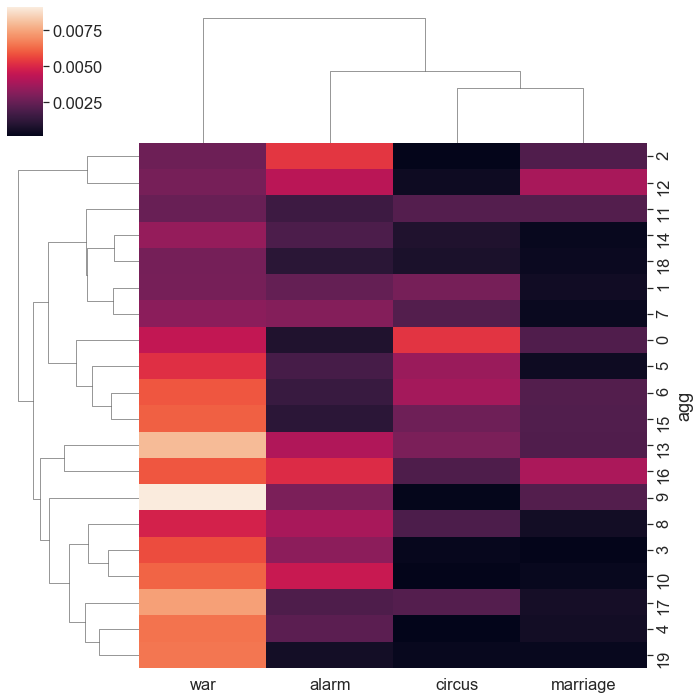

In [1638]:
sns.clustermap(agg_en_topics)

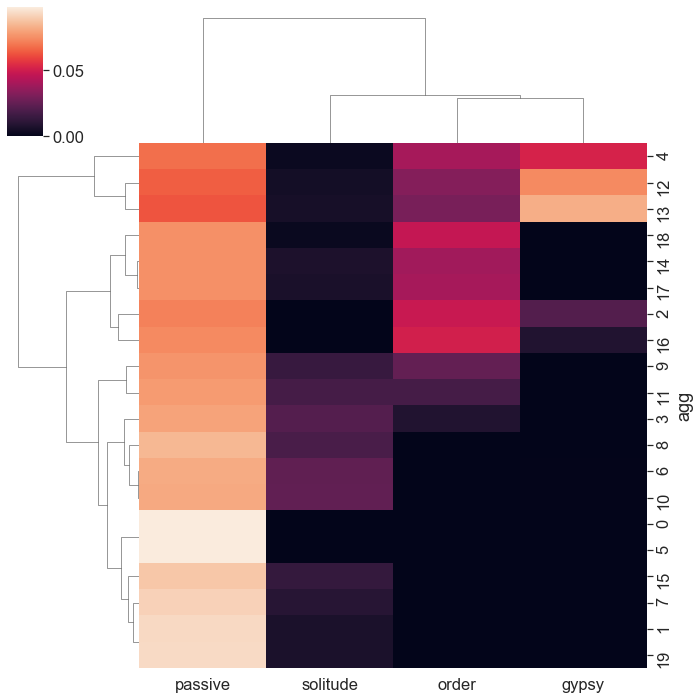

In [1706]:
sns.clustermap(agg_tr_topics)